<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-2/blob/main/4%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0923_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 개정2판 ch8. 1~3

p.488-508

# [Chapter 8] 텍스트 분석

- NLP(National Language Processing) : 머신이 인간의 언어를 이해하고 해석하는데 더 중점을 두고 기술 발전
  - 기계 번역
  - 질의응답 시스템
- 텍스트 분석(Text Analytics) : 텍스트 마이닝이라고도 불리며, 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 더 중점을 두고 기술 발전
  - 텍스트 분류(Text Classification)
    - Text Categorization이라고도 하며, 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭
    - 지도학습 적용
  - 감성 분석(Sentiment Analysis)
    - 텍스트에서 나타나는 감정, 의견, 기분 등의 주관적 요소를 분석하는 기법을 총칭
    - 소셜미디어 감정 분석, 리뷰, 여론조사 의견 분석 등 다양하게 활용
    - 지도, 비지도학습 사용
  - 텍스트 요약(Summarization) :
    - 텍스트 내에서 중요한 주제나 중심 사상 추출하는 기법
    - 대표적으로 토픽 모델링(Topic Modeling)
  - 텍스트 군집화(Clustering)와 유사도 측정
    - 비슷한 유형의 문서에 대해 군집화 수행하는 기법
    - 문서들간의 유사도를 측정해 비슷한 문서들끼리 모으는 방법

## 8-1. 텍스트 분석 이해

- 텍스트 분석
  - 비정형 데이터인 텍스트를 분석
  - 비정형 텍스트 데이터를 머신러닝에 적용하기 위해 어떻게 피처 형태로 추출하고, 추출한 피처에 의미 있는 값을 부여하는지가 매우 중요한 요소
- 피처 벡터화(Feature Vectorization), 피처 추출(Feature Extraction)
  - 텍스트를 word 기반의 다수의 피처로 추출, 피처에 단어 빈도수와 같은 숫자값을 부여하여 단어의 조합인 벡터값으로 표현 가능
  - BOW(Bag of Words)
  - Word2Vec

### 텍스트 분석 수행 프로세스
1. 텍스트 사전 준비작업(텍스트 전처리)
  - 클렌징, 대/소문자 변경, 특수문자 삭제, 토큰화, 의미 없는 단어(Stop word) 제거, 어근 추출(Stemming/Lemmatization) 등
2. 피처 벡터화/추출
  - 가공된 텍스트에서 피처 추출 후, 벡터 값 할당
  - BOW : Count 기반 or TF-IDF 기반 벡터화
  - Word2Vec
3. ML 모델 수립 및 학습/예측/평가
  - 피처 벡터화된 데이터 세트에 ML 적용, 학습/예측 및 평가 수행




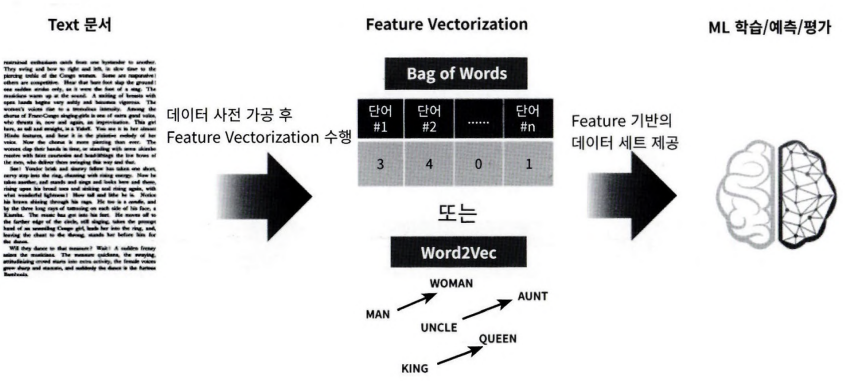

### 파이썬 기반의 NLP, 텍스트 분석 패키지


- NLTK(Natural Language Toolkit for Python) : 가장 대표적인 NLP 패키지, 수행 속도 측면에서 아쉬운 부분이 있어 실제 대량 데이터 기반에서는 제대로 활용되지 못함
- Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지, Word2Vec 기능 제공
- SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

## 8-2. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

- 텍스트 정규화
  - 클렌징 : 분석에 방해되는 불필요한 문자, 기호 등을 사전에 제거
  - 토큰화 : 문장 토큰화/ 단어 토큰화
  - 필터링/ 스톱워드 제거/ 철자 수정
  - Stemming
  - Lemmatization

### 텍스트 토큰화

- 문장 토큰화 : 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
- sent_tokenize() 사용
- nltk.download('punkt') : 마침표, 개행 문자등의 데이터 세트 다운로드

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- 단어 토큰화 : 기본적으로 공백, 콤마(,), 마침표(,), 개행문자 등으로 단어 분리
- word_tokenize() 사용

In [ ]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


- 문서에 대해 모든 단어 토큰화 (sent_tokenize, word_tokenize 조합)

In [ ]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- n_gram : 연속된 n개의 단어를 하나의 토큰화 단위로 분리
  - n개 단어 크기의 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화 수행
  - 문맥적 의미가 무시되는 문제점을 해결하고자 도입

### 스톱 워드 제거
스톱 워드(Stop word) : 분석에 큰 의미가 없는 단어
  - is, the, a, will 등 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어
  - 문법적인 특성으로 인해 자주 쓰이므로 사전에 제거하지 않으면 중요한 단어로 인지될 수 있음

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


- is, this와 같은 스톱 워드 제거됨

### Stemming과 Lemmatization
- 단어의 원형을 찾는 것
- Stemming : 철자가 훼손된 어근 단어 추출하는 경향
  - Lancaster, Porter, Snowball Stemmer
- Lemmatization : 품사 같은 문법적 요소, 의미적 부분 감안하여 정확한 철자로 된 어근 단어 찾아줌
  - WordNetLemmatizer

- LancasterStemmer
  - stemmer.stem('단어') : 원하는 '단어'의 Stemming 가능

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- work 같이 단순하게 변화하는 단어의 경우 제대로 인식
- amuse/happy/fancy 등 복잡하게 변화할 경우 정확한 원형을 찾지 못함

- WordNetLemmatizer
  - lemma.lemmatize('단어','품사') : 파라미터로 단어의 품사 입력

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## 8-3. Bag of Words - BOW

- Bag of Words : 문서가 가지는 모든 단어를 문맥, 순서 무시하고 일괄적으로 단어에 빈도 값을 부여해 피처 값 추출하는 모델

[step]
1. 문장에 있는 모든 단어에서 중복 제거 후, 각 단어에 고유 인덱스 부여
2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어에 기재

[대표적 단점]

- 문맥 의미(Semantic Context) 반영 부족 : 단어의 순서를 고려하지 않기 때문에 단어의 문맥적 의미가 무시됨, 보완을 위해 n_gram 기법을 활용해도 제한적인 부분에 그침
- 희소 행렬 문제 : BOW로 피처 벡터화 수행 시 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움, 희소행렬은 일반적으로 ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨림
  - 희소 행렬(Sparse Matrix) : 대부분의 값이 0으로 채워진 행렬

### BOW 피처 벡터화

- 피처 벡터화 : 텍스트를 특정 의미를 가지는 벡터 값으로 변환
- BOW 피처 벡터화
  - 카운트 기반 벡터화 : 각 문서에 해당 단어가 나타난 횟수를 단어 피처에 값으로 부여
  - TF-IDF(Term Frequency - Inverse Document Frequency) 기반 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치, 모든 문서에서 전반적으로 나타나는 단어에는 페널티

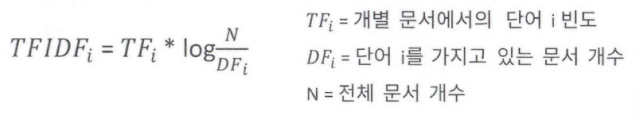

### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

- CountVectorizer : 카운트 기반 벡터화
  - 피처 벡터화, 텍스트 전처리(소문자 일괄 변환, 토큰화, 스톱 워드 필터링)
  - fit(), transform()을 통해 피처 벡터화된 객체 반환
  - 입력 파라미터
    - max_df : 정수는 k개 이하로 나타나는 단어만 피처로 추출, 실수면(0.0-1.0) 빈도수 0~k%까지의 단어만 피처로 추출
    - min_df : 너무 낮은 빈도수를 가지는 단어 피처 제외
    - max_features : 추출하는 피처의 개수 제한, 정수값
    - stop_words : 'english'로 지정 시 영어의 스톱워드는 추출에서 제외
    - n_gram_range : 튜플 형태로 (범위 최솟값, 최댓값) 지정
    - analyzer : 피처 추출을 수행한 단위 지정
    - token_pattern : 토큰화를 수행하는 정규 표현식 패턴 지정
    - tokenizer : 토큰화를 별도의 커스텀 함수로 이용 시 적용


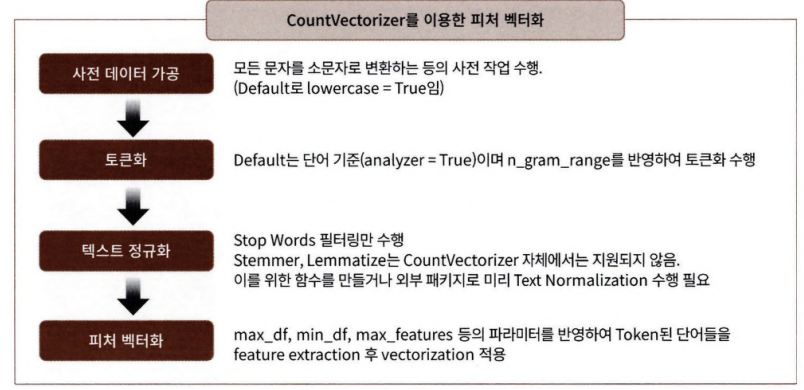

- TfidfVectorizer : TF-IDF 벡터화

### BOW 벡터화를 위한 희소 행렬

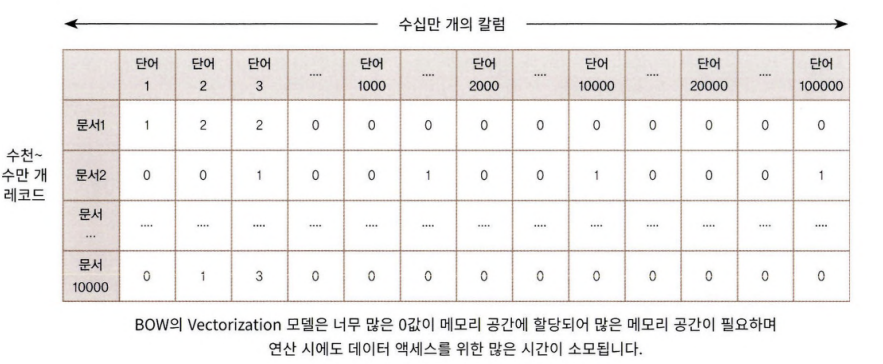

- 너무 많은 불필요한 0 값이 메모리에 할당되어 많은 메모리 공간 필요
- 행렬의 크기가 커서 연산 시 데이터 액세스를 위한 시간이 많이 소모됨


- 희소 행렬 변환
  - COO
  - CSR : 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 더 뛰어남

### 희소 행렬 - COO 형식

- COO : 좌표 형식, 0이 아닌 데이터만 별도의 데이터 Array에 저장 후, 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장
- scipy의 sparse 패키지 사용

In [ ]:
import numpy as np

dense = np.array( [ [3,0,1], [0,2,0] ] )

In [ ]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

- 0이 아닌 데이터를 별도의 배열 데이터로 생성
- 행 위치, 열 위치 배열 각각 생성하여 coo_matrix()에 입력

In [ ]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식

- CSR(Compressed Sparse Row)
  - COO 형식이 행, 열의 위치 나타내기 위해 반복적인 데이터를 사용해아 하는 문제점을 해결한 방식
  - 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식

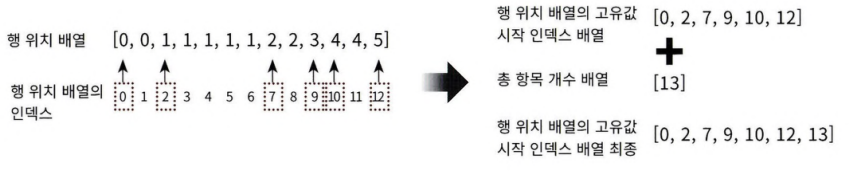

- scipy의 csr_matrix 클래스 사용

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSF 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

- CountVectorizer, TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 사이파이의 CSR 형태의 희소 행렬